<a href="https://colab.research.google.com/github/mapmatters/coursera-nlp/blob/main/nlp_class_1_Week1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [105]:
import nltk                                # Python library for NLP
from nltk.corpus import twitter_samples    # sample Twitter dataset from NLTK
import matplotlib.pyplot as plt            # library for visualization
import random                              # pseudo-random number generator

In [106]:
nltk.download('twitter_samples')

[nltk_data] Downloading package twitter_samples to /root/nltk_data...
[nltk_data]   Package twitter_samples is already up-to-date!


True

In [107]:
# select the set of positive and negative tweets
all_positive_tweets = twitter_samples.strings('positive_tweets.json')
all_negative_tweets = twitter_samples.strings('negative_tweets.json')

In [108]:
print('Number of pos tweets: ', len(all_positive_tweets))
print('Number of neg tweets: ', len(all_negative_tweets))

print('\nThe type of all_positive_tweets is: ', type(all_positive_tweets))
print('The type of a tweet entry is: ', type(all_negative_tweets[0]))

Number of pos tweets:  5000
Number of neg tweets:  5000

The type of all_positive_tweets is:  <class 'list'>
The type of a tweet entry is:  <class 'str'>


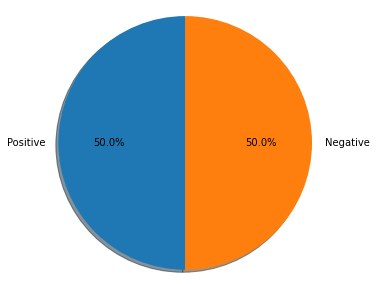

In [109]:
fig = plt.figure(figsize=(5,5))
labels = 'Positive', 'Negative'
sizes = [len(all_positive_tweets), len(all_negative_tweets)]

plt.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)

plt.axis('equal')
plt.show()

In [110]:
print('\033[92m' + all_positive_tweets[random.randint(0,5000)])
print('\033[91m' + all_negative_tweets[random.randint(0,5000)])

@spencerlist Yay another vine I love it. PLEASE can you do more vines?With peyton too :)
@KanchuDarling @VidyutJammwal hey babe i just came across this pic..what is this about? I cant read hindi :(


In [111]:
tweet = all_positive_tweets[2277]
print(tweet)

My beautiful sunflowers on a sunny Friday morning off :) #sunflowers #favourites #happy #Friday off… https://t.co/3tfYom0N1i


In [112]:
# download the stopwords from NLTK
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [113]:
import re                                  # library for regular expression operations
import string                              # for string operations

from nltk.corpus import stopwords          # module for stop words that come with NLTK
from nltk.stem import PorterStemmer        # module for stemming
from nltk.tokenize import TweetTokenizer   # module for tokenizing strings

In [114]:
# Remove hyperlinks, Twitter marks and styles
print('\033[92m' + tweet)
print('\033[94m')

# remove old style retweet text "RT"
tweet2 = re.sub(r'^RT[\s]+', '', tweet)

# remove hyperlinks
tweet2 = re.sub(r'https?:\/\/.*[\r\n]*', '', tweet2)

# remove hashtags
# only removing the hash # sign from the word
tweet2 = re.sub(r'#', '', tweet2)

print(tweet2) 

My beautiful sunflowers on a sunny Friday morning off :) #sunflowers #favourites #happy #Friday off… https://t.co/3tfYom0N1i

My beautiful sunflowers on a sunny Friday morning off :) sunflowers favourites happy Friday off… 


In [115]:
# Tokenize the string
print()
print('\033[092m' + tweet2)
print('\033[094m')

tokenizer = TweetTokenizer(preserve_case=False, strip_handles=True, reduce_len=True)
tweet_tokens = tokenizer.tokenize(tweet2)
print()
print('Tokenized string:')
print(tweet_tokens)


My beautiful sunflowers on a sunny Friday morning off :) sunflowers favourites happy Friday off… 


Tokenized string:
['my', 'beautiful', 'sunflowers', 'on', 'a', 'sunny', 'friday', 'morning', 'off', ':)', 'sunflowers', 'favourites', 'happy', 'friday', 'off', '…']


In [116]:
# remove stop words and punctuations
stopwords_english = stopwords.words('english')

print('Stor words\n')
print(stopwords_english)
print(len(stopwords_english))

print('\nPunctuation\n')
print(string.punctuation)

Stor words

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so

In [117]:
print()
print('\033[92m')
print(tweet_tokens)
print('\033[94m')

tweets_clean = []

for word in tweet_tokens:
  if (word not in stopwords_english and
      word not in string.punctuation):
    tweets_clean.append(word)

print('removed stop words and punctuations:')
print(tweets_clean)





['my', 'beautiful', 'sunflowers', 'on', 'a', 'sunny', 'friday', 'morning', 'off', ':)', 'sunflowers', 'favourites', 'happy', 'friday', 'off', '…']

removed stop words and punctuations:
['beautiful', 'sunflowers', 'sunny', 'friday', 'morning', ':)', 'sunflowers', 'favourites', 'happy', 'friday', '…']


In [118]:
# stemming
print()
print('\033[92m')
print(tweet_tokens)
print('\033[94m')

stemmer = PorterStemmer()

tweets_stem = []
for word in tweets_clean:
  stem_word = stemmer.stem(word)
  tweets_stem.append(stem_word)

print('stemmed word:')
print(tweets_stem)



['my', 'beautiful', 'sunflowers', 'on', 'a', 'sunny', 'friday', 'morning', 'off', ':)', 'sunflowers', 'favourites', 'happy', 'friday', 'off', '…']

stemmed word:
['beauti', 'sunflow', 'sunni', 'friday', 'morn', ':)', 'sunflow', 'favourit', 'happi', 'friday', '…']


In [119]:
!pip install utils

In [120]:
def process_tweet(t):
  """
  input: tweet
  output: list of words
  """
  stemmer = PorterStemmer()
  stopwords_english = stopwords.words('english')
  t = re.sub(r'\$\w*','', t) # remove stock market tickers
  t = re.sub(r'^RT[\s]+','',t) # retweet text
  t = re.sub(r'https?:\/\/.*[\r\n]*', '', t) # remove hyperlink
  t = re.sub(r'#', '', t) # remove hash # sing

  tokenizer = TweetTokenizer(preserve_case=False, strip_handles=True, reduce_len=True)
  tweet_token = tokenizer.tokenize(t)

  tweet_clean = []
  for word in tweet_token:
    if (word not in stopwords_english and word not in string.punctuation):
      stem_word = stemmer.stem(word)
      tweet_clean.append(stem_word)
  return tweet_clean


In [121]:
import numpy as np
np.set_printoptions(precision=3)

def build_freqs(tweets, ys):
  yslist = np.squeeze(ys).tolist()
  
  freqs = {}
  for y, t in zip(yslist, tweets):
      for word in process_tweet(t):
          pair = (word, y)
          if pair in freqs:
              freqs[pair] += 1
          else:
              freqs[pair] = 1

  return freqs

In [122]:
def extract_features(pt, ref):
  # pt에 담겨있는 word 별 각각의 pos/neg key를 찾아서 value 얻고
  # 얻어진 value를 모두 sum
  sum_pos, sum_neg = 0, 0
  for word in pt:
    pos_pair = (word, 1)
    neg_pair = (word, 0)
    if pos_pair in ref:
      sum_pos += ref[pos_pair]
    else:
      sum_pos += 0
    if neg_pair in ref:
      sum_neg += ref[neg_pair]
    else:
      sum_neg += 0
  return (1, sum_pos, sum_neg)

In [123]:
# process_tweets()
# from utils import process_tweet # Import the process_tweet function

tweet = all_positive_tweets[2277]

print()
print('\033[92m')
print(tweet)
print('\033[94m')

tweets_stem = process_tweet(tweet)

print('preprocessed tweet:')
print(tweets_stem)



My beautiful sunflowers on a sunny Friday morning off :) #sunflowers #favourites #happy #Friday off… https://t.co/3tfYom0N1i

preprocessed tweet:
['beauti', 'sunflow', 'sunni', 'friday', 'morn', ':)', 'sunflow', 'favourit', 'happi', 'friday', '…']


In [124]:
tweets = all_positive_tweets + all_negative_tweets
m = int(len(tweets)/2)
ys_1 = np.ones((m,1)) 
ys_2 = np.zeros((m,1))
ys = np.vstack([ys_1, ys_2])

freqs = build_freqs(tweets, ys)
X = np.zeros((m,3))

In [125]:
for i in range(m):
  p_tweet = process_tweet(tweets[i])
  X[i,:] = extract_features(p_tweet, freqs)

In [126]:
np.set_printoptions(formatter={'float_kind': lambda x: "{0:0.0f}".format(x)})

X

array([[1, 3764, 72],
       [1, 4464, 517],
       [1, 3759, 160],
       ...,
       [1, 4141, 608],
       [1, 4082, 473],
       [1, 800, 156]])